In [3]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, Dropout,BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import regularizers
import pandas as pd
import cv2 as cv2
import numpy as np 
from matplotlib import pyplot as plt 
import os 
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [4]:
dataset = "C://Users//R1007398//Downloads//Books_AIML//Innomatics//CV//CNN//Codes//Datasets//ASL_datasets"
Train_path = "C://Users//R1007398//Downloads//Books_AIML//Innomatics//CV//CNN//Codes//Datasets//ASL_datasets//asl-alphabet-train"
Test_path = r"C:\Users\R1007398\Downloads\Books_AIML\Innomatics\CV\CNN\Codes\Datasets\ASL_datasets\asl-alphabet-test"

In [5]:
dirls = os.listdir(Train_path)
print(dirls)
val = Train_path + '\\'+dirls[0]
print(val)


['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C://Users//R1007398//Downloads//Books_AIML//Innomatics//CV//CNN//Codes//Datasets//ASL_datasets//asl-alphabet-train\A


In [6]:
def loading_images(path):
    pathnames = []
    dir_list = os.listdir(path)
    unique_classes = sorted(dir_list)
    for i in range(len(unique_classes)):
        newpath = Train_path + "\\"+ unique_classes[i]
        pathnames.append(newpath)
    return(pathnames, unique_classes)   

In [7]:
paths, classes = loading_images(Train_path)

In [8]:
def labeling_images(unique_paths, unique_classes):
    img_paths =[]
    labels = []
    for path, label in zip(unique_paths, unique_classes):
        dir_list = os.listdir(path)
        for i in dir_list:
            img_dir_list = path + "\\" + i
            img_paths.append(img_dir_list)
            labels.append(label)
    return(img_paths, labels)
    

In [9]:
img_paths , labels = labeling_images(paths, classes)

In [10]:
print(img_paths.__len__())
print(labels.__len__())

870
870


<class 'numpy.ndarray'>


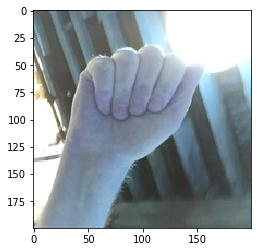

In [11]:
img = cv2.imread(img_paths[0])
print(type(img))
plt.imshow(img)

In [12]:
dataset = list(zip(img_paths, labels))

In [13]:
dataset[0:5]

[('C://Users//R1007398//Downloads//Books_AIML//Innomatics//CV//CNN//Codes//Datasets//ASL_datasets//asl-alphabet-train\\A\\A0001_test.jpg',
  'A'),
 ('C://Users//R1007398//Downloads//Books_AIML//Innomatics//CV//CNN//Codes//Datasets//ASL_datasets//asl-alphabet-train\\A\\A0002_test.jpg',
  'A'),
 ('C://Users//R1007398//Downloads//Books_AIML//Innomatics//CV//CNN//Codes//Datasets//ASL_datasets//asl-alphabet-train\\A\\A0003_test.jpg',
  'A'),
 ('C://Users//R1007398//Downloads//Books_AIML//Innomatics//CV//CNN//Codes//Datasets//ASL_datasets//asl-alphabet-train\\A\\A0004_test.jpg',
  'A'),
 ('C://Users//R1007398//Downloads//Books_AIML//Innomatics//CV//CNN//Codes//Datasets//ASL_datasets//asl-alphabet-train\\A\\A0005_test.jpg',
  'A')]

In [14]:
dataset_df = pd.DataFrame(dataset, columns = ['Image_Paths', 'Labels'])

In [15]:
dataset_df.head()
print(dataset_df.Labels.value_counts())

J          30
U          30
Y          30
Z          30
T          30
H          30
N          30
V          30
S          30
Q          30
P          30
K          30
E          30
G          30
I          30
L          30
D          30
space      30
M          30
C          30
O          30
del        30
nothing    30
F          30
B          30
W          30
X          30
R          30
A          30
Name: Labels, dtype: int64


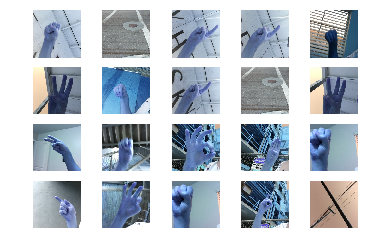

In [16]:
for i in range(0, 20):
    vals = np.random.randint(1, len(dataset_df))
    plt.subplot(4,5, i+1)
    plt.imshow(cv2.imread(dataset_df.Image_Paths[vals]))
    plt.axis('off')
plt.show()

In [17]:
Train, Test = train_test_split(dataset_df, train_size = 0.90, random_state=0)
Train_new, valid = Train, Test = train_test_split(dataset_df, train_size = 0.90, random_state=0)
print(Train.shape, Test.shape, valid.shape, Train_new.shape)

C:\Users\R1007398\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(783, 2) (87, 2) (87, 2) (783, 2)


In [18]:
train_datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0., 
                                  zoom_range=0.2, horizontal_flip = True, vertical_flip=True)
test_datagen = ImageDataGenerator(rescale = 1.0/255)

In [19]:
train_gen = train_datagen.flow_from_dataframe(dataframe = Train_new, x_col='Image_Paths', y_col='Labels', batch_szie=16, 
                                             target_size=(64,64), class_mode = 'categorical', shuffle=True)
valid_gen = train_datagen.flow_from_dataframe(dataframe = valid, x_col='Image_Paths', y_col='Labels', batch_szie=16, 
                                             target_size=(64,64), class_mode = 'categorical', shuffle=True)
test_gen = train_datagen.flow_from_dataframe(dataframe = Test, x_col='Image_Paths', y_col='Labels', batch_szie=16, 
                                             target_size=(64,64), class_mode = 'categorical', shuffle=True)

Found 783 validated image filenames belonging to 29 classes.
Found 87 validated image filenames belonging to 29 classes.
Found 87 validated image filenames belonging to 29 classes.


In [20]:
train_gen[0][0].shape

(32, 64, 64, 3)

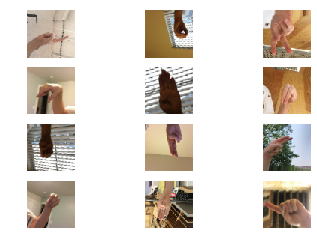

In [21]:
for i in range(0, 12):
    val= train_gen[0][0][i]
    vals = val.astype('uint8')
    plt.subplot(4, 3, i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

In [22]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size= [3,3], padding = 'same', activation = 'relu',input_shape = (64, 64, 3)))
model.add(Conv2D(filters = 32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))


model.add(Conv2D(filters = 32, kernel_size= [3,3], padding = 'same', activation = 'relu',input_shape = (64, 64, 3)))
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))

model.add(Conv2D(filters = 128, kernel_size= [3,3], padding = 'same', activation = 'relu',input_shape = (64, 64, 3)))
model.add(Conv2D(filters = 256, kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(29, activation='softmax'))
# model.summary()

Transfer_learning

In [46]:
base_model = tf.keras.applications.VGG16(weights='imagenet', input_shape=(200,200,3), include_top =False)
network =Sequential()
network.add(base_model)
network.add(GlobalAveragePooling2D())
network.add(Dense(128, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))
network.add(Dense(29, activation='softmax'))

In [ ]:
net.compile(optimizer = Adam(lr=0.01), loss = 'categorical_crossentropy', metrics = ["accuracy"])
net_hist = net.fit(train_gen, epochs = 5, validation_data = valid_gen, verbose=1)

In [27]:
model.compile(loss='categorical_crossentropy', optimizer= Adam(lr=0.01), metrics=['accuracy'])
hist = model.fit(train_gen,  batch_size =64, validation_data = valid_gen, epochs=50, verbose=1)

Epoch 1/50
25/25 [==============================] - 28s 1s/step - loss: 2.2289 - accuracy: 0.3525 - val_loss: 2.5421 - val_accuracy: 0.3103
Epoch 2/50
25/25 [==============================] - 9s 371ms/step - loss: 2.1966 - accuracy: 0.3653 - val_loss: 2.2944 - val_accuracy: 0.3678
Epoch 3/50
25/25 [==============================] - 10s 407ms/step - loss: 2.1779 - accuracy: 0.3985 - val_loss: 2.2641 - val_accuracy: 0.4138
Epoch 4/50
25/25 [==============================] - 11s 450ms/step - loss: 2.0349 - accuracy: 0.3844 - val_loss: 2.3638 - val_accuracy: 0.3448
Epoch 5/50
25/25 [==============================] - 12s 492ms/step - loss: 2.0903 - accuracy: 0.3934 - val_loss: 2.1267 - val_accuracy: 0.4138
Epoch 6/50
25/25 [==============================] - 12s 463ms/step - loss: 2.1536 - accuracy: 0.3946 - val_loss: 2.5603 - val_accuracy: 0.3218
Epoch 7/50
25/25 [==============================] - 11s 434ms/step - loss: 2.1852 - accuracy: 0.3780 - val_loss: 2.3268 - val_accuracy: 0.3103
Epo

In [ ]:
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
